In [27]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 


from sklearn.preprocessing import MinMaxScaler


from math import sqrt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from wrangle import wrangle_zillow
from wrangle import split_data

1. Load your zillow dataset.

In [10]:
df = wrangle_zillow()
df.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,62,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,97,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [11]:
train, validate, test = split_data(df)
train.head(), validate.head(), test.head()

(              id  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 1390568  1926267         3.0          2.0                        1344.0   
 370716    513686         3.0          2.0                        1419.0   
 1654098  2291034         2.0          1.0                        1584.0   
 2001339  2771257         4.0          2.5                        2432.0   
 500984    693923         3.0          1.0                        1308.0   
 
          taxvaluedollarcnt  yearbuilt  taxamount    fips  
 1390568            84589.0     1942.0    1038.36  6037.0  
 370716             44477.0     1931.0     648.10  6037.0  
 1654098            62080.0     1920.0    1320.82  6037.0  
 2001339           393655.0     1997.0    3557.42  6059.0  
 500984            333038.0     1920.0    4033.16  6037.0  ,
               id  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 1149310  1591739         3.0          2.0                        1280.0   
 1518826  2103670         3.0

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

In [ ]:
# assuming X and y are already defined
#model = LinearRegression().fit(X, y)
#predictions = model.predict(X)


In [13]:
train = train.drop(columns=['bedroomcnt','bathroomcnt',
                    'yearbuilt','taxamount', 'fips'])


KeyError: "['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'taxamount', 'fips'] not found in axis"

In [14]:
train.head()

,id,calculatedfinishedsquarefeet,taxvaluedollarcnt
1390568,1926267,1344.0,84589.0
370716,513686,1419.0,44477.0
1654098,2291034,1584.0,62080.0
2001339,2771257,2432.0,393655.0
500984,693923,1308.0,333038.0


In [17]:
mms = MinMaxScaler()

train['sqft'] = mms.fit_transform(train[['calculatedfinishedsquarefeet']])

In [18]:
X_train = train[['calculatedfinishedsquarefeet']]
y_train = train.taxvaluedollarcnt

X_validate = validate[['calculatedfinishedsquarefeet']]
y_validate = validate.taxvaluedollarcnt

X_test = test[['calculatedfinishedsquarefeet']]
y_test = test.taxvaluedollarcnt

In [19]:
X_train.head()

,calculatedfinishedsquarefeet
1390568,1344.0
370716,1419.0
1654098,1584.0
2001339,2432.0
500984,1308.0


In [20]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [21]:
train['yhat'] = predictions

In [22]:
train.head()

,id,calculatedfinishedsquarefeet,taxvaluedollarcnt,sqft,yhat
1390568,1926267,1344.0,84589.0,0.001410,349536.461789
370716,513686,1419.0,44477.0,0.001489,365540.002731
1654098,2291034,1584.0,62080.0,0.001662,400747.792802
2001339,2771257,2432.0,393655.0,0.002552,581694.495715
500984,693923,1308.0,333038.0,0.001372,341854.762137


In [23]:
train = train.drop(columns=['id'])

3. Plot the residuals for the linear regression model that you made.

In [25]:
train['residuals'] = train.taxvaluedollarcnt - train.yhat

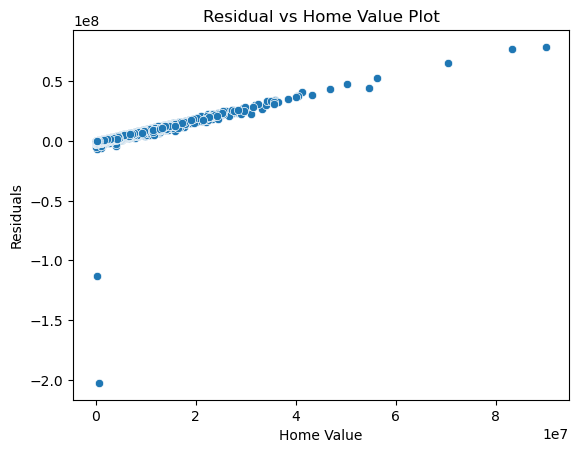

In [28]:
sns.scatterplot(data=train, x='taxvaluedollarcnt', y='residuals')

plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')
plt.show()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [29]:
MSE = mean_squared_error(train.taxvaluedollarcnt, train.yhat)
MSE

363074259446.4542

In [30]:
SSE = MSE * len(train)
SSE

4.662385425998292e+17

In [31]:
RMSE = MSE**.5
RMSE

602556.4367314104

In [33]:
ESS = ((train.yhat - train.taxvaluedollarcnt.mean())**2).sum()
ESS

1.0847360359685651e+17

In [34]:
TSS = ESS + SSE
TSS

5.747121461966857e+17

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [35]:
train['baseline'] = train.taxvaluedollarcnt.mean()

In [37]:
MSE_baseline = mean_squared_error(train.taxvaluedollarcnt, train.baseline)
MSE_baseline

447545983031.9685

In [38]:
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

5.7471214619665504e+17

In [39]:
RMSE_baseline = MSE_baseline**.5
RMSE_baseline

668988.7764618839

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [40]:
if SSE < SSE_baseline:
    print('OSL model is better than baseline')
else:
    print('OSL model is worse than baseline. :( )')

OSL model is better than baseline


7. What is the amount of variance explained in your model?

In [41]:
R2 = ESS / TSS
R2

0.18874423363889237

In [43]:
r2_score(train.taxvaluedollarcnt, train.yhat)

0.18874423363884918

8. Is your model better than the baseline model?

In [44]:
RMSE_baseline - RMSE

66432.33973047347

9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

In [ ]:
def plot_residuals(y, yhat):
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('taxvaluedollarcnt')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

regression_errors(y, yhat): returns the following values:

    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)



In [ ]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return SSE, ESS, TSS, MSE, RMSE

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [ ]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    return SSE, MSE, RMSE

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [ ]:
def better_than_baseline(y, yhat):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('OSL model performs better than baseline')
    else:
        print('OSL model performs worse than baseline. :( )')
